## Kiva Loan Funding - Exploratory Data Analysis

**PURPOSE**: Predict which microfinance loans will be funded

**AUTHOR** : Maureen Wiebe

**DATA SOURCES**:<br> 
- Kiva Developer Tools: https://www.kiva.org/build/data-snapshots
    
**REV DATE**: 5-4-2021

In [3]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.set_option('max_columns', None)

### Data Import

Cleaned dataset from the last 6 months of 2019 is imported from the data wrangling notebook. 

In [4]:
loans_rand = pd.read_pickle('C:/Users/mwalz2/Documents/Python/Springboard/Kiva_Capstone_Project/data/interim/loans_rand_clean.pkl')

In [3]:
loans_rand.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,FUNDED_PERCENT,STATUS,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY_EXCHANGE_RATE_CALC,CURRENCY,PARTNER_ID,MONTH,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,RAISED_HOURS,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,NUM_BORROWERS_TOTAL,BORROWER_NAMES,BORROWER_GENDERS,FEMALE_ONLY_LOAN,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,Tag_Low-profit FP,Tag_Woman Owned Biz,Tag_Parent,Tag_Repeat Borrower,Tag_Schooling,Tag_Biz Durable Asset,Tag_Vegan,Tag_user_favorite,Tag_Eco-friendly,Tag_Technology,Tag_Health and Sanitation,Tag_Animals,Tag_volunteer_pick,Tag_Hidden Gem,Tag_Interesting Photo,Tag_Single,Tag_Sustainable Ag,Tag_volunteer_like,Tag_First Loan,Tag_Single Parent,Tag_Elderly,Tag_Fabrics,Tag_Supporting Family,Tag_Female Education,Tag_Repair Renew Replace,Tag_Job Creator,Tag_Widowed,Tag_Inspiring Story,Tag_Trees,Tag_Unique,Tag_Refugee,Tag_Post-disbursed,Tag_Powerful Story,Tag_Orphan,Tag_US immigrant,Tag_Tourism,Tag_Married,Tag_Team Guys Holding Fish,Activity_Air Conditioning,Activity_Animal Sales,Activity_Aquaculture,Activity_Arts,Activity_Auto Repair,Activity_Bakery,Activity_Balut-Making,Activity_Barber Shop,Activity_Beauty Salon,Activity_Beekeeping,Activity_Beverages,Activity_Bicycle Repair,Activity_Bicycle Sales,Activity_Blacksmith,Activity_Bookbinding,Activity_Bookstore,Activity_Bricks,Activity_Butcher Shop,Activity_Cafe,Activity_Call Center,Activity_Carpentry,Activity_Catering,Activity_Cattle,Activity_Celebrations,Activity_Cement,Activity_Cereals,Activity_Charcoal Sales,Activity_Cheese Making,Activity_Child Care,Activity_Cleaning Services,Activity_Cloth & Dressmaking Supplies,Activity_Clothing,Activity_Clothing Sales,Activity_Cobbler,Activity_Communications,Activity_Computer,Activity_Computers,Activity_Construction,Activity_Construction Supplies,Activity_Consumer Goods,Activity_Cosmetics Sales,Activity_Crafts,Activity_Dairy,Activity_Decorations Sales,Activity_Dental,Activity_Education provider,Activity_Electrical Goods,Activity_Electrician,Activity_Electronics Repair,Activity_Electronics Sales,Activity_Embroidery,Activity_Energy,Activity_Entertainment,Activity_Event Planning,Activity_Farm Supplies,Activity_Farming,Activity_Film,Activity_Fish Selling,Activity_Fishing,Activity_Florist,Activity_Flowers,Activity_Food,Activity_Food Market,Activity_Food Production/Sales,Activity_Food Stall,Activity_Fruits & Vegetables,Activity_Fuel/Firewood,Activity_Funerals,Activity_Furniture Making,Activity_Games,Activity_General Store,Activity_Goods Distribution,Activity_Grocery Store,Activity_Hardware,Activity_Health,Activity_Higher education costs,Activity_Home Appliances,Activity_Home Energy,Activity_Home Products Sales,Activity_Hotel,Activity_Internet Cafe,Activity_Jewelry,Activity_Knitting,Activity_Land Rental,Activity_Landscaping / Gardening,Activity_Laundry,Activity_Liquor Store / Off-License,Activity_Livestock,Activity_Machine Shop,Activity_Machinery Rental,Activity_Manufacturing,Activity_Medical Clinic,Activity_Metal Shop,Activity_Milk Sales,Activity_Mobile Phones,Activity_Mobile Transactions,Activity_Motorcycle Repair,Activity_Motorcycle Transport,Activity_Movie Tapes & DVDs,Activity_Music Discs & Tapes,Activity_Musical Instruments,Activity_Musical Performance,Activity_Natural Medicines,Activity_Office Supplies,Activity_Paper Sales,Activity_Party Supplies,Activity_Patchwork,Activity_Perfumes,Activity_Personal Care Products,Activity_Personal Expenses,Activity_Personal Housing Expenses,Activity_Personal Medical Expenses,Activity_Personal Products Sales,Activity_Pharmacy,Activity_Phone Accessories,Activity_Phone Repair,Activity_Phone Use Sales,Activity_Photography,Activity_Pigs,Activity_Plastics Sales,Activity_Poultry,Activity_Primary/secondary school costs,Activity_Printing,Activity_Property,Activity_Pub,A

## Outcome Value: Loan Status 

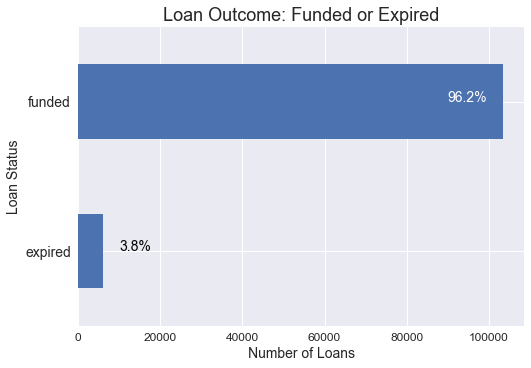

In [25]:
loans_rand.groupby('STATUS').LOAN_ID.count().plot(kind ='barh')
plt.title('Loan Outcome: Funded or Expired', fontsize =18)
plt.xlabel('Number of Loans', fontsize =14)
plt.ylabel('Loan Status', fontsize =14)
plt.annotate("96.2%", xy =(90000,1), color = 'white', fontsize =14)
plt.annotate("3.8%", xy =(10000,0), color = 'black', fontsize =14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.show()

### Correlation 

To determine if there are any apparent relationships between the variables a correlation matrix was constructed. I focused on the funding outcome for the loan because this is the variable we are looking to predict.  Correlation coefficents fall between (-1 to 1). The closer the absolute value of the number is to 1 the stronger the correlation. None of the variables had extremely strong correlations, but since the number of loans that aren't funded is so minimal that smaller correlations can still be helpful signals.  

In [5]:
correlation = loans_rand.corr()

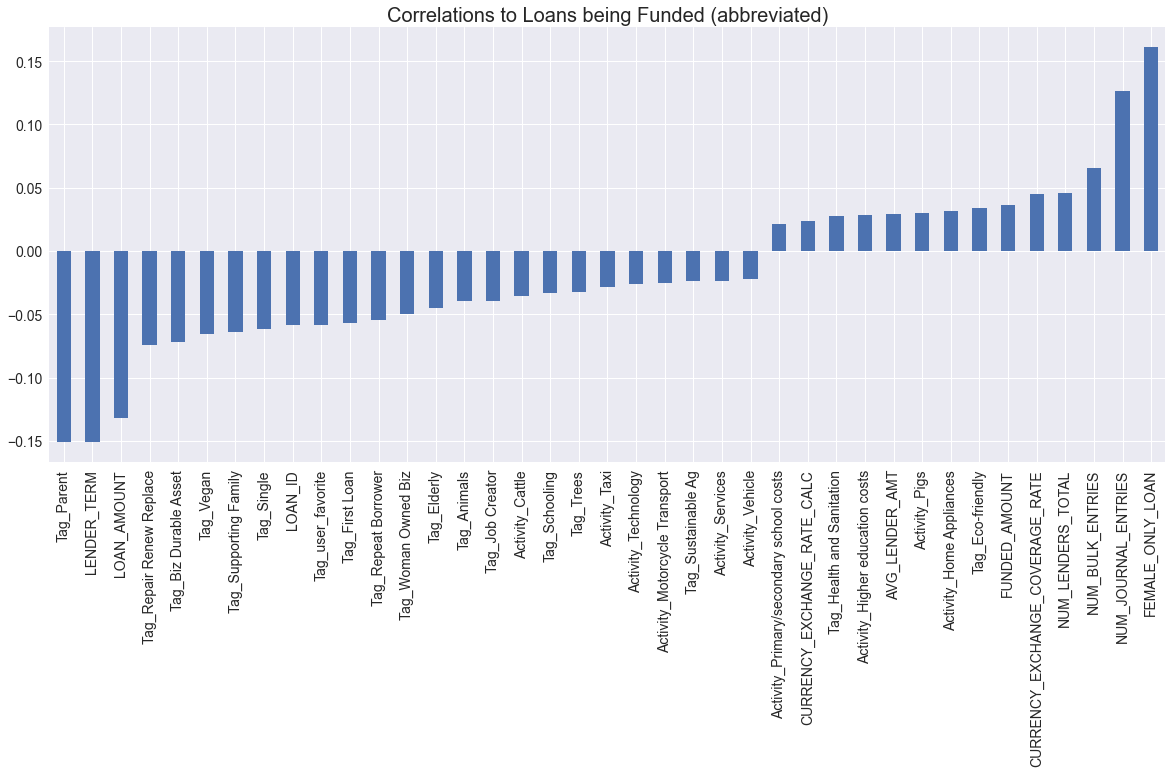

In [6]:
correlation.loc[abs(correlation.Status_funded).between(0.02,0.6) ,'Status_funded'].sort_values().plot(kind ='bar',figsize= (20,8))
plt.title('Correlations to Loans being Funded (abbreviated)', fontsize =20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Loan Amount and Lender Term
Expired loans tend to be for a higher amount of money and the lender term is longer on average. 

In [7]:
loans_rand.groupby(['STATUS']).agg({'LOAN_ID':'count','LOAN_AMOUNT': ['median'], 'LENDER_TERM':['median']}).round(0)

,LOAN_ID,LOAN_AMOUNT,LENDER_TERM
,count,median,median
STATUS,,,
expired,6192,1012.0,14.0
funded,103442,475.0,13.0


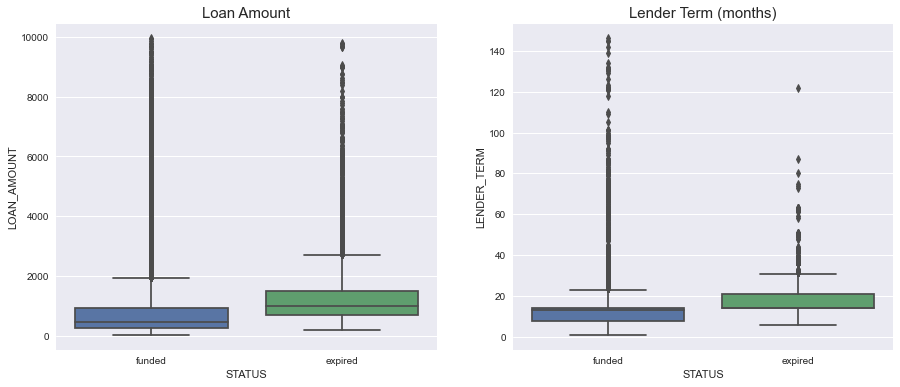

In [8]:
#How to show this box plot with such extreme outliers?
f, axes = plt.subplots(figsize = (15, 6), nrows = 1, ncols = 2)
sns.boxplot(x='STATUS', y='LOAN_AMOUNT', data =loans_rand[loans_rand.LOAN_AMOUNT <10000], ax= axes[0])
sns.boxplot(x='STATUS', y='LENDER_TERM', data =loans_rand, ax= axes[1])
axes[0].set_title('Loan Amount', fontsize=15)
axes[1].set_title('Lender Term (months)', fontsize=15)
plt.show()

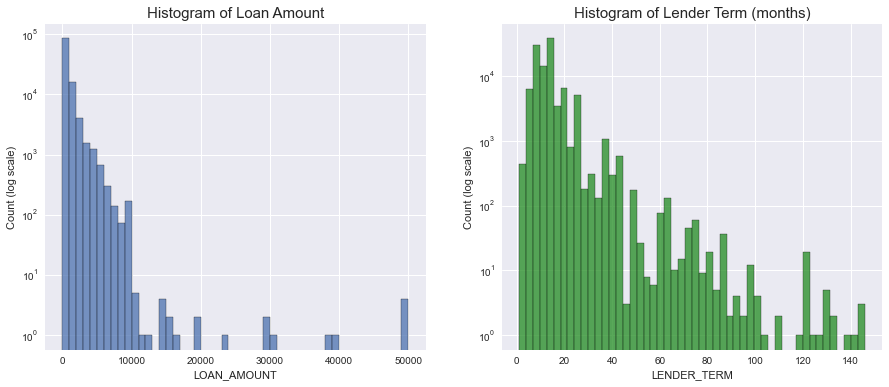

In [9]:
f, axes = plt.subplots(figsize = (15, 6), nrows = 1, ncols = 2)
sns.histplot(x='LOAN_AMOUNT', data =loans_rand, bins = 50, ax= axes[0])
sns.histplot(x='LENDER_TERM', data =loans_rand, color ='forestgreen', bins = 50, ax= axes[1])
axes[0].set_title('Histogram of Loan Amount', fontsize=15)
axes[1].set_title('Histogram of Lender Term (months)', fontsize=15)
axes[0].set_ylabel('Count (log scale)')
axes[1].set_ylabel('Count (log scale)')
axes[0].set_yscale('log')
axes[1].set_yscale('log')

### Currency Exchange Coverage Rate
One of the negatively correlated variables was the Currency Exchange Coverage Rate. Kiva has established two different options for their field partners to manage the fluctuations in exchange rates. The first policy is a shared model where the Field Partner takes on risk associated with currency fluctuations and is responsible for the first 10% of currency losses. The second model called the standard model is setup where all risk is shared and any currency exchange losses are covered by ALL lenders rather than the field partners bearing the responsibility.

Interestingly, it appears that loans were more often funded that adhered to the standard model where the lenders took on the risk of currency fluctuations. 

*In the previous notebook a new calculated field was created called Currency Exchange Rate Calc which took information from the currency exchance coverage rate and currency policy features to eliminate the NaN values.  This feature is the most accurate representation of this data and was used for analysis. 

In [10]:
#NaN values do not show up when summarizing data and therefore the graph below is incomplete. Unsure how to best include the data
loans_rand.CURRENCY_EXCHANGE_RATE_CALC.value_counts(dropna = False)

0.1    88420
0.0    14597
0.2     6617
Name: CURRENCY_EXCHANGE_RATE_CALC, dtype: int64

In [11]:
loans_rand.CURRENCY_POLICY.value_counts()

shared      96275
standard    13359
Name: CURRENCY_POLICY, dtype: int64

In [15]:
#summarize the data based on the currency exchange rate and how the number of loans that don't get funded are related to the currency exchange coverage rate
exchange_rate = pd.DataFrame(loans_rand.pivot_table(index = 'CURRENCY_EXCHANGE_RATE_CALC', columns = 'STATUS', 
                       values ='LOAN_ID', aggfunc ='count', fill_value = 99, margins = True).to_records())
exchange_rate['Expired Percent']=(exchange_rate['expired']/exchange_rate['All'])
exchange_rate

,CURRENCY_EXCHANGE_RATE_CALC,expired,funded,All,Expired Percent
0,0,734,13863,14597,0.050284
1,0.1,5434,82986,88420,0.061457
2,0.2,24,6593,6617,0.003627
3,All,6192,103442,109634,0.056479


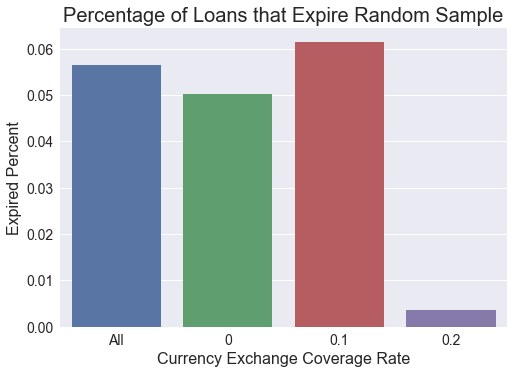

In [17]:
sns.barplot(x ='CURRENCY_EXCHANGE_RATE_CALC', y='Expired Percent', data=exchange_rate, order =['All', 0, 0.1, 0.2])
plt.title('Percentage of Loans that Expire Random Sample', fontsize =20)
plt.xlabel('Currency Exchange Coverage Rate', fontsize =16)
plt.ylabel('Expired Percent',fontsize =16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

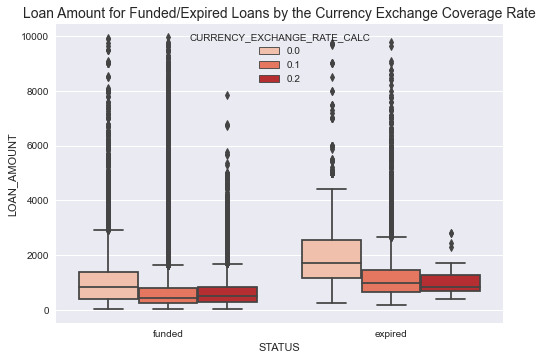

In [14]:
sns.boxplot(x='STATUS', y='LOAN_AMOUNT', hue = 'CURRENCY_EXCHANGE_RATE_CALC', palette='Reds',
            data =loans_rand[(loans_rand.LOAN_AMOUNT <10000)])
plt.title('Loan Amount for Funded/Expired Loans by the Currency Exchange Coverage Rate', fontsize =14)
plt.show()

### Journal Entries
One feature on the Kiva website is the option for borrowers to provide updates via a "journal".  This allows them to provide updates or provide a glimpse into their lives.  The vast majority of loans only had a single (initial) journal entry that describes the loan.  However, loans that had even just one additional journal entry rarely expired before being fully funded.  

In [15]:
#Create new features that summarizes journal entries by 1, 2 or more
loans_rand['JOURNAL_ENTRY_CAT']=1
loans_rand.loc[loans_rand.NUM_JOURNAL_ENTRIES ==2,'JOURNAL_ENTRY_CAT']=2
loans_rand.loc[loans_rand.NUM_JOURNAL_ENTRIES >2,'JOURNAL_ENTRY_CAT']='>2'

In [16]:
journal =pd.DataFrame(loans_rand.pivot_table(index = ['JOURNAL_ENTRY_CAT'], columns = 'STATUS', 
                       values ='LOAN_ID', aggfunc ='count', margins = True).to_records())
journal['Expired Percent']=( journal['expired']/ journal['All'])
journal

,JOURNAL_ENTRY_CAT,expired,funded,All,Expired Percent
0,1,6179,65048,71227,0.086751
1,2,12,29348,29360,0.000409
2,>2,1,9046,9047,0.000111
3,All,6192,103442,109634,0.056479


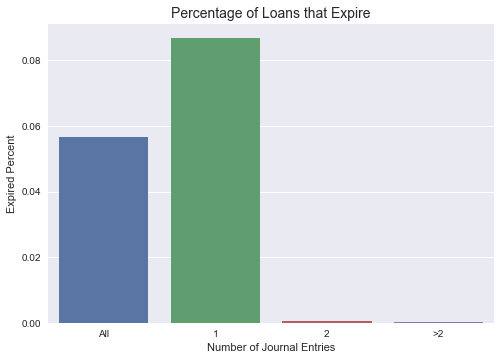

In [17]:
sns.barplot(x ='JOURNAL_ENTRY_CAT', y='Expired Percent', data=journal, order =['All', 1, 2,'>2'])
plt.title('Percentage of Loans that Expire', fontsize =14)
plt.xlabel('Number of Journal Entries')
plt.show()

## Female Loans
Part of Kiva's philosophy was to empower women and provide them with the financial means to improve their lives. On the website you have the ability to filter the loans to only female borrowers and a popular tag used is "woman owned biz". To further explore if a loan being a "female only loan" (only female borrowers, if more than one borrower), an additional feature was created that had one of the highest correlations with loans being funded or not.  Based on the raw data female loans at a rate almost a whole percentage point less than all of the loans. Diving deeper into this data, however, it seems like the size of the female only loans and lender term tend to be smaller and shorter which was previously identified as being correlated with a higher rate of funding.  

In [18]:
#create a table that summarizes the loan STATUS by the gender of the borrowers
female_loans = pd.DataFrame(loans_rand.pivot_table(index ='FEMALE_ONLY_LOAN', columns ='STATUS', values='LOAN_ID', aggfunc ='count', margins = True).to_records())
female_loans['FEMALE_ONLY_LOAN']=['Male or Mixed Gender','Female Only', 'All Loans']
female_loans['Expired Percent']=(female_loans['expired']/female_loans['All'])
female_loans

,FEMALE_ONLY_LOAN,expired,funded,All,Expired Percent
0,Male or Mixed Gender,3328,24269,27597,0.120593
1,Female Only,2864,79173,82037,0.034911
2,All Loans,6192,103442,109634,0.056479


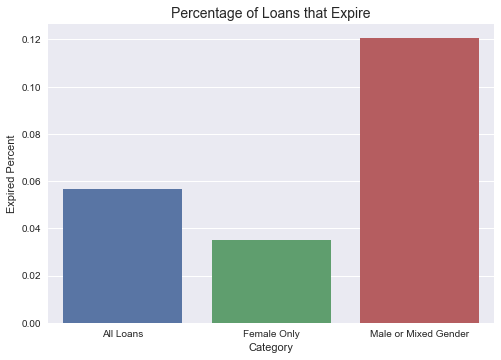

In [19]:
#Visualize how the gender of the borrower impacts how frequently loans are not fully funded
sns.barplot(x ='FEMALE_ONLY_LOAN', y='Expired Percent', data=female_loans, order =['All Loans', 'Female Only', 'Male or Mixed Gender'])
plt.title('Percentage of Loans that Expire', fontsize =14)
plt.xlabel('Category')
plt.show()

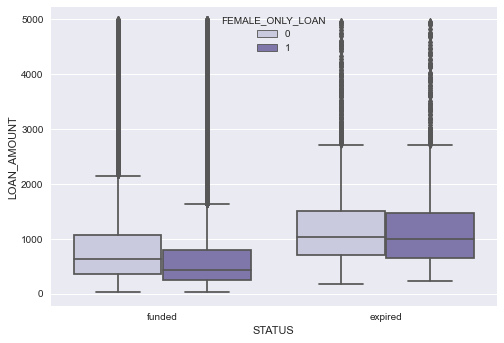

In [20]:
g= sns.boxplot(x='STATUS', y='LOAN_AMOUNT', hue = 'FEMALE_ONLY_LOAN', palette='Purples',
            data =loans_rand[(loans_rand.LOAN_AMOUNT <5000)])

plt.show()

In [21]:
loans_rand.pivot_table(index ='FEMALE_ONLY_LOAN', columns =['STATUS'], values=['LOAN_AMOUNT','LOAN_ID'], aggfunc ={'LOAN_ID':'count','LOAN_AMOUNT':'mean'}, margins = True)

LOAN_AMOUNT                           LOAN_ID          \
STATUS                expired       funded          All expired  funded   
FEMALE_ONLY_LOAN                                                          
0                 1472.693810  1058.946599  1108.841541    3328   24269   
1                 1358.056913   707.846109   730.545668    2864   79173   
All               1419.670543   790.219398   825.770062    6192  103442   

                          
STATUS               All  
FEMALE_ONLY_LOAN          
0                  27597  
1                  82037  
All               109634

In [22]:
#Also by funded and not funded SECTOR and ACTIVITY boxplots for loan amount and loan terms  and also graphic showing overall %
#Consider having a country viz with funded/expired 

## Time of Year
One of the highly correlated features in the 2019 dataset was the month that the loan was posted. Based on this dataset the general trend is that the further into the year the more likely that the loan will be funded. However, after examining the larger dataset of loan data from 2011-2020 this same trend does not hold true.

In [5]:
month = pd.DataFrame(loans_rand.pivot_table(index =['MONTH'], columns ='STATUS', values ='POSTED_TIME', aggfunc ='count', fill_value =0).to_records())
month['PERCENT_FUNDED']=month.funded/(month.funded + month.expired)
month

,MONTH,expired,funded,PERCENT_FUNDED
0,1,431,7740,0.947252
1,2,194,8061,0.976499
2,3,357,9141,0.962413
3,4,551,8178,0.936877
4,5,759,8773,0.920373
5,6,623,8431,0.931191
6,7,711,8764,0.924960
7,8,512,8511,0.943256
8,9,574,8712,0.938187
9,10,632,9219,0.935844


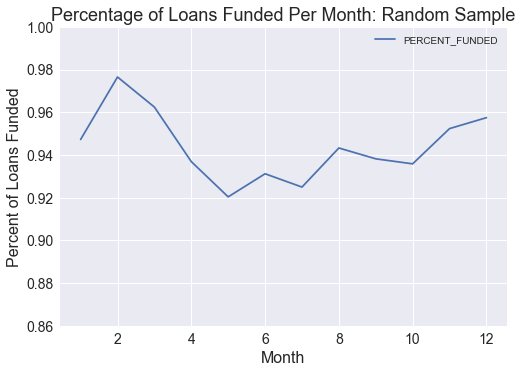

In [13]:

month.plot(x='MONTH', y='PERCENT_FUNDED')
plt.ylim(0.86,1)
plt.ylabel('Percent of Loans Funded',fontsize =16)
plt.xlabel('Month',fontsize =16)
plt.title('Percentage of Loans Funded Per Month: Random Sample', fontsize =18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

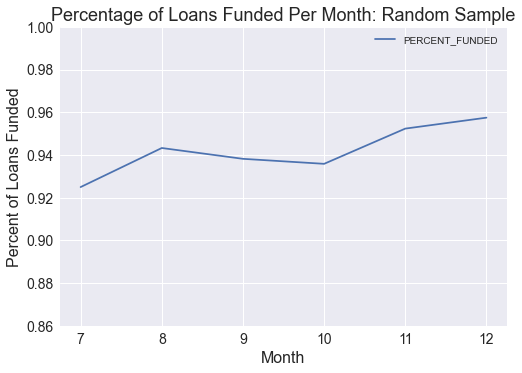

In [18]:
month[month.MONTH.between(7,12)].plot(x='MONTH', y='PERCENT_FUNDED')
plt.ylim(0.86,1)
plt.ylabel('Percent of Loans Funded',fontsize =16)
plt.xlabel('Month',fontsize =16)
plt.title('Percentage of Loans Funded Per Month: Random Sample', fontsize =18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Loan Activity 

#### Loan Summary Table by Loan Activity 
Each loan is categorized based on how it will be used.  My hypothesis is that lenders will lend based on how the loan will be used. To understand the loans characteristics and differences in how often loans for different activities are funded the data was summarized by activity type. 

In [33]:
#Create summary pivot table of loan information
loan_summary= pd.DataFrame(loans_rand.pivot_table(index = ['SECTOR_NAME', 'ACTIVITY_NAME'], columns = 'STATUS', values = ['LOAN_ID','LOAN_AMOUNT','LENDER_TERM','RAISED_HOURS', 'FUNDED_PERCENT'], aggfunc={'LOAN_ID':'count','LOAN_AMOUNT':'median', 'LENDER_TERM':'median','RAISED_HOURS':'median', 'FUNDED_PERCENT':'median'}, fill_value =0 ).to_records())

#rename the columns
loan_summary.columns = ['SECTOR_NAME', 'ACTIVITY_NAME', 'EXP_FUNDED_PERCENT','FUND_FUNDED_PERCENT', 'EXP_LENDER_TERM','FUND_LENDER_TERM', 'EXP_LOAN_AMOUNT',
       'FUND_LOAN_AMOUNT', 'EXP_TOTAL_LOANS','FUND_TOTAL_LOANS', 'EXP_RAISED_HOURS','FUND_RAISED_HOURS']
#remove columns that don't apply based on loan status 
loan_summary.drop(['EXP_RAISED_HOURS','FUND_FUNDED_PERCENT'], axis = 1, inplace = True) 

#Add two additional columns to summarize all loan information 
loan_summary['TOTAL_LOANS']= loan_summary.EXP_TOTAL_LOANS + loan_summary.FUND_TOTAL_LOANS
loan_summary['FUNDED_PERCENT']= loan_summary.FUND_TOTAL_LOANS/loan_summary.TOTAL_LOANS

#rearrange the columns
loan_summary = loan_summary[['SECTOR_NAME', 'ACTIVITY_NAME', 'TOTAL_LOANS', 'FUNDED_PERCENT', 'FUND_TOTAL_LOANS', 'EXP_TOTAL_LOANS', 
       'FUND_LOAN_AMOUNT','EXP_LOAN_AMOUNT', 'FUND_LENDER_TERM', 'EXP_LENDER_TERM','FUND_RAISED_HOURS' , 'EXP_FUNDED_PERCENT']]

In [34]:
loan_summary.head()

,SECTOR_NAME,ACTIVITY_NAME,TOTAL_LOANS,FUNDED_PERCENT,FUND_TOTAL_LOANS,EXP_TOTAL_LOANS,FUND_LOAN_AMOUNT,EXP_LOAN_AMOUNT,FUND_LENDER_TERM,EXP_LENDER_TERM,FUND_RAISED_HOURS,EXP_FUNDED_PERCENT
0,Agriculture,Agriculture,4025,0.932422,3753,272,600.0,1050.0,14.0,14.0,254.030,0.505
1,Agriculture,Animal Sales,1397,0.930565,1300,97,650.0,1375.0,14.0,14.0,244.535,0.480
2,Agriculture,Aquaculture,43,0.976744,42,1,500.0,425.0,14.0,14.0,174.540,0.180
3,Agriculture,Beekeeping,32,1.000000,32,0,625.0,0.0,19.0,0.0,87.985,0.000
4,Agriculture,Cattle,1501,0.873418,1311,190,725.0,1137.5,14.0,15.0,334.490,0.425


### Percent Funded 
One of the key metrics when looking at the breakdown of loans by activity was which activities have the highest percentage of loans that are funded. The majority of loans were over 93% funded but there was some significant outliers like loans for Hotels and Taxis where less than 70% of the loans were funded. 

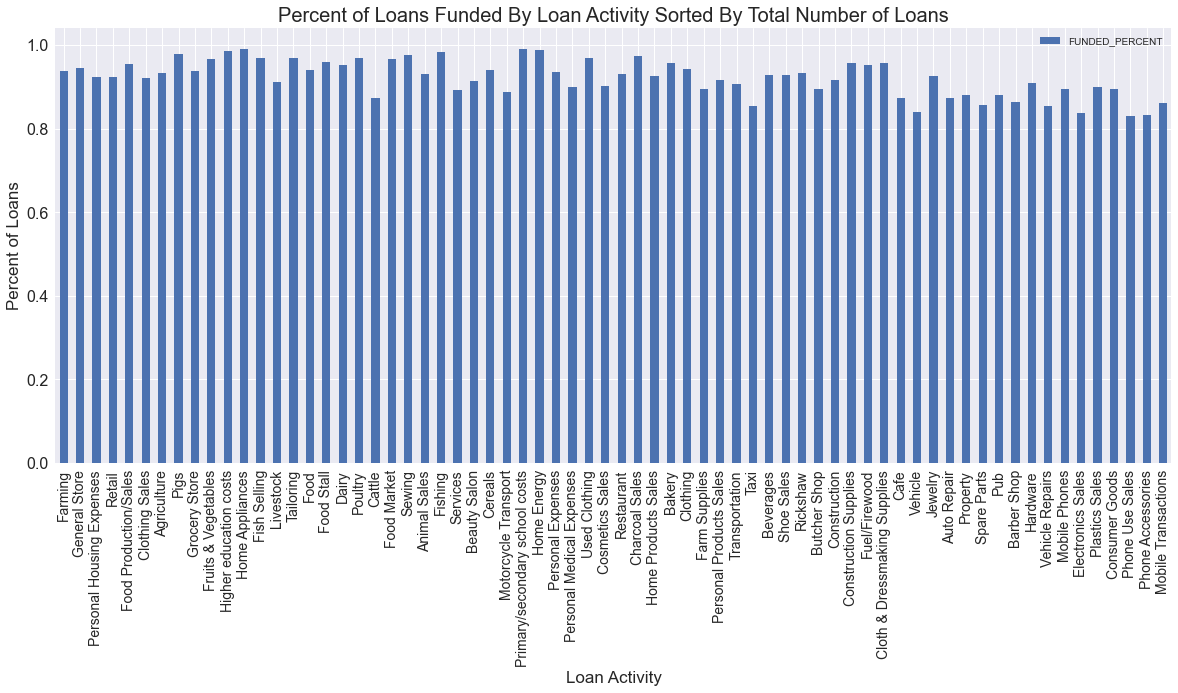

In [35]:
#Graph summarizing % Funded segments of loans sorted by the greatest number of loans 
loan_summary[(loan_summary.EXP_TOTAL_LOANS >10)].sort_values('TOTAL_LOANS', ascending = False).plot(kind = 'bar', x = 'ACTIVITY_NAME', y = ['FUNDED_PERCENT'],  figsize= (20,8))
plt.title("Percent of Loans Funded By Loan Activity Sorted By Total Number of Loans", fontsize =20)
plt.ylabel("Percent of Loans", fontsize = 17)
plt.xlabel("Loan Activity", fontsize = 17)
plt.xticks(fontsize =14)
plt.yticks(fontsize =16)
plt.show()

### Expired Loans 
Since the percentage of loans that aren't funded is less than 4% the total number of loans that weren't funded in a specific category was signficant.  For example while taxi loans aren't funded as frequently the total number of loans in this category is relatively small so its contribution to the total expired loans is much smaller than the expired loans for farming or general stores.

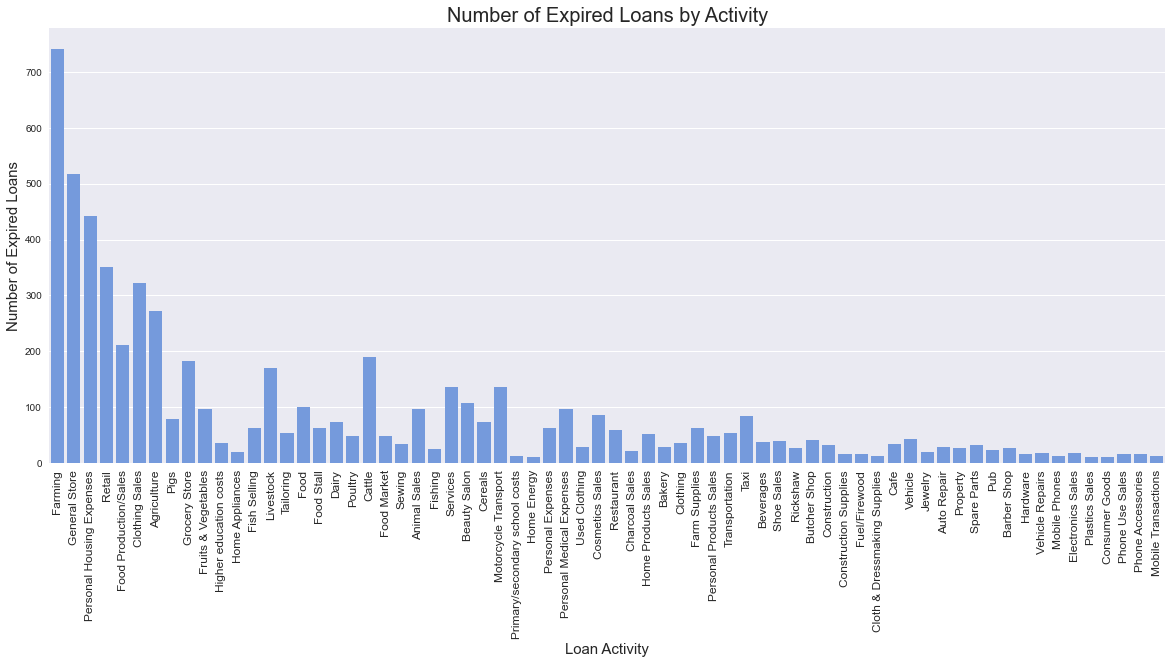

In [36]:

fig, ax1 = plt.subplots(figsize=(20,8))
sns.barplot(data = loan_summary[loan_summary.EXP_TOTAL_LOANS>10].sort_values('TOTAL_LOANS', ascending = False), x ='ACTIVITY_NAME', y='EXP_TOTAL_LOANS',
            color = 'cornflowerblue')   
plt.xticks(rotation=90, fontsize = 12)
ax1.set_xlabel('Loan Activity', fontsize =15)
ax1.set_ylabel('Number of Expired Loans', fontsize =15)
ax1.set_title("Number of Expired Loans by Activity", fontsize =20)

plt.show()

### Loan Amount and Lender Term 
As we saw when looking at the loan data in aggregate, loans for more money with longer terms tended to get funded less often.   This held true across the different loan categories. There were also trends in the size of the loan and the lender term based on the activity.   

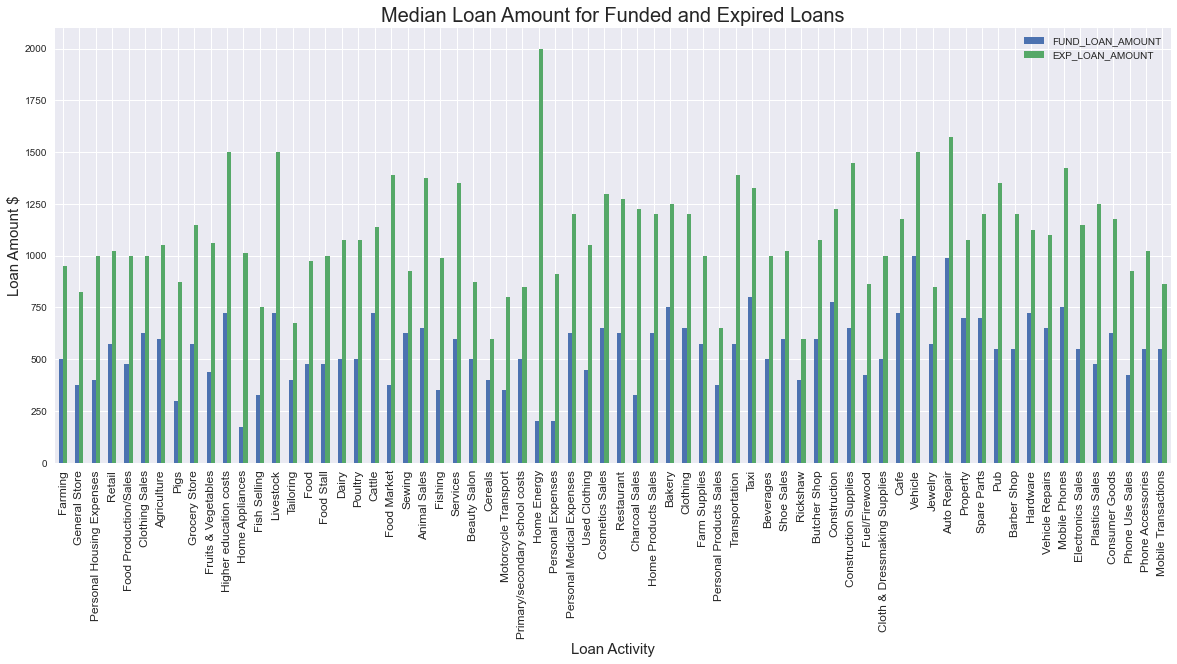

In [37]:
#Graph summarizing Loan Amount for segments of loans; loans that weren't funded tended to be for larger loans 
loan_summary[(loan_summary.EXP_TOTAL_LOANS >10)].sort_values('TOTAL_LOANS', ascending = False).plot(kind = 'bar', x = 'ACTIVITY_NAME', y = ['FUND_LOAN_AMOUNT','EXP_LOAN_AMOUNT'],  figsize= (20,8))
plt.title("Median Loan Amount for Funded and Expired Loans", fontsize =20)
plt.ylabel("Loan Amount $", fontsize =15)
plt.xlabel("Loan Activity", fontsize =15)
plt.xticks(rotation=90, fontsize = 12)
plt.show()

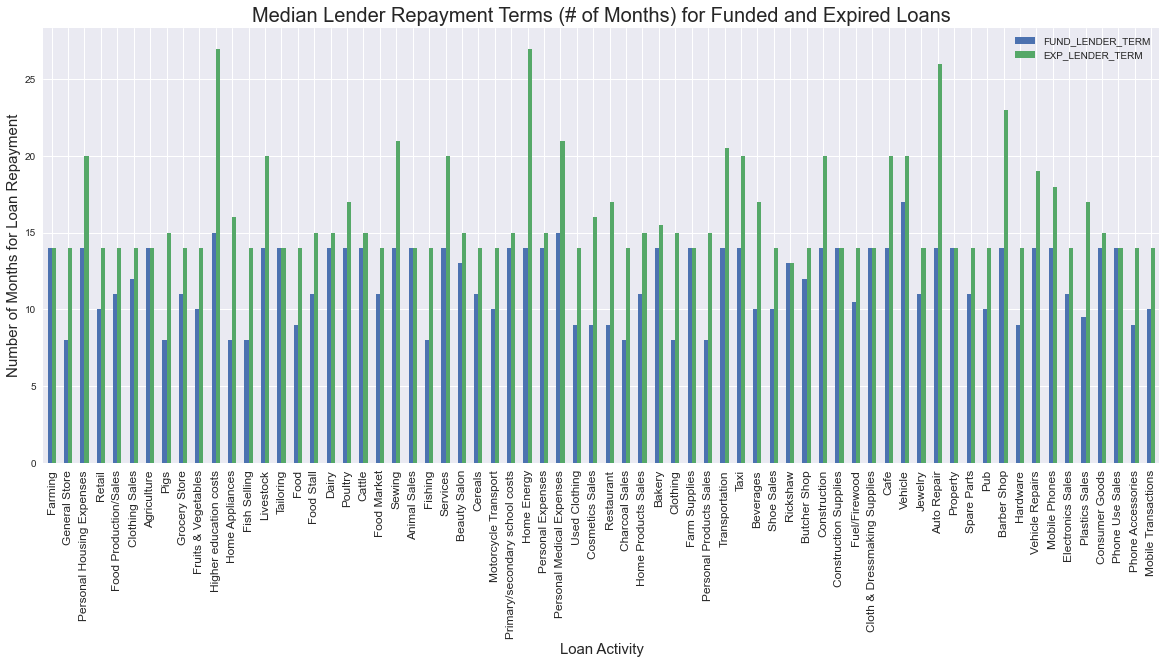

In [38]:
#Graph summarizing Lender terms for segments of loans; loans that weren't funded tended to have longer lender terms
loan_summary[(loan_summary.EXP_TOTAL_LOANS >10)].sort_values('TOTAL_LOANS', ascending = False).plot(kind = 'bar', x = 'ACTIVITY_NAME', y = ['FUND_LENDER_TERM','EXP_LENDER_TERM'], figsize= (20,8))
plt.title("Median Lender Repayment Terms (# of Months) for Funded and Expired Loans", fontsize =20)
plt.ylabel("Number of Months for Loan Repayment", fontsize =15)
plt.xlabel("Loan Activity", fontsize =15)
plt.xticks(rotation=90, fontsize = 12)
plt.show()